# Introduction to cheminformatics

Adapted from TeachOpenCADD project

#### Basic handling of molecules

* Reading & writing of molecules
* Molecular descriptors & fingerprints
* Molecular similarity

#### Using RDKit: open source cheminformatics software

More information can be found here:

* http://www.rdkit.org/docs/index.html
* http://www.rdkit.org/docs/api/index.html

In [1]:
# The majority of the basic molecular functionality is found in module rdkit.Chem library
from rdkit import Chem
from rdkit.Chem import AllChem

## Representation of molecules

### SMILES (Simplified Molecular Input Line Entry Specification)

* Atoms are represented by atomic symbols: C, N, O, F, S, Cl, Br, I
* Double bonds are `=`, triple bonds are `#`
* Branching is indicated by parenthesis
* Ring closures are indicated by pairs of matching digits

More information can be found here: http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html

In [32]:
# Individual molecules can be constructed using a variety of approaches
# FDA approved EGFR inhibitors: Gefitinib, Erlotinib

mol1 = Chem.MolFromSmiles('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1')
mol2 = Chem.MolFromSmiles('C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1')

#### Drawing molecules

In [33]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

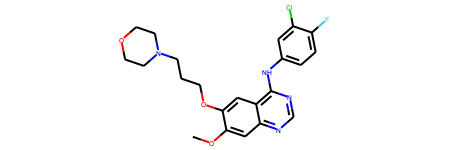

In [34]:
# Single molecule
mol1

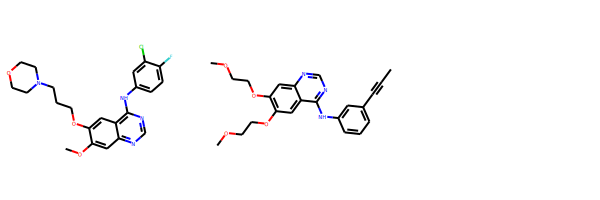

In [31]:
# List of molecules
Draw.MolsToGridImage([mol1,mol2], useSVG=True)

#### Molecule representation

In [6]:
# Molecule representation
print(Chem.MolToMolBlock(mol1))


     RDKit          2D

 31 34  0  0  0  0  0  0  0  0999 V2000
    0.7500   -6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -5.1962    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500    3.8971    0

### Generating 3D coordinates

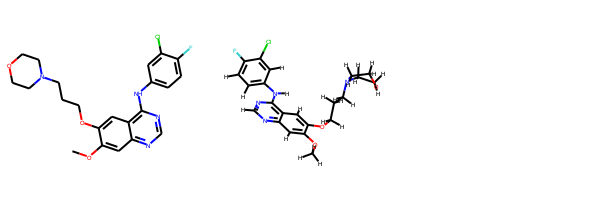

In [35]:
m_3D = Chem.AddHs(mol1)
AllChem.EmbedMolecule(m_3D)
#AllChem.UFFOptimizeMolecule(m_3D) # Improves the quality of the conformation; this step should not be necessary since v2018.09: default conformations use ETKDG
Draw.MolsToGridImage([mol1,m_3D])

In [36]:
print(Chem.MolToMolBlock(m_3D))


     RDKit          3D

 55 58  0  0  0  0  0  0  0  0999 V2000
    0.3072   -4.7003    4.1795 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5830   -3.9064    3.0424 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3850   -3.0285    2.5289 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6205   -2.8956    3.0860 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5384   -2.0138    2.5387 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7617   -1.8710    3.0731 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6826   -1.0308    2.5745 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.3437   -0.3125    1.4948 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1516   -0.3697    0.8736 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8476    0.4418   -0.2302 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8168    1.2994   -0.7986 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1644    1.1186   -0.8418 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0349    2.0576   -1.4047 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.5081    3.1988   -1

### Writing molecules to *sdf* (structure data files)

In [37]:
w = Chem.SDWriter('./data/mytest_mol3D.sdf')
w.write(m_3D)
w.close()

### Descriptors

#### Molecular descriptors (global)

In [11]:
from rdkit.Chem import Descriptors

In [38]:
print ('Heavy atoms:', Descriptors.HeavyAtomCount(mol1))
print ('H-bond donors:', Descriptors.NumHDonors(mol1))
print ('H-bond acceptors:', Descriptors.NumHAcceptors(mol1))
print ('Molecular weight:', Descriptors.MolWt(mol1))
print ('LogP:', Descriptors.MolLogP(mol1))

Heavy atoms: 31
H-bond donors: 1
H-bond acceptors: 7
Molecular weight: 446.9100000000004
LogP: 4.275600000000003


In [39]:
print ('Heavy atoms:', Descriptors.HeavyAtomCount(mol2))
print ('H-bond donors:', Descriptors.NumHDonors(mol2))
print ('H-bond acceptors:', Descriptors.NumHAcceptors(mol2))
print ('Molecular weight:', Descriptors.MolWt(mol2))
print ('LogP:', Descriptors.MolLogP(mol2))

Heavy atoms: 29
H-bond donors: 1
H-bond acceptors: 7
Molecular weight: 393.4430000000002
LogP: 3.405100000000002


#### Better for similarity search: Molecular fingerprints

GL: I don't see any utility in introducing MACCS keys to beginners. These days I think they are primarily of historic interest and it would be better to use something the Morgan FP or RDKit FP here. Or, if you want something simple, atom pairs/topological torsions. If you're going to use them, you might as well pull the SMARTS from the RDKit directly instead of retyping them in. I've changed that.

#### MACCS keys

* There is a SMARTS-based implementation of the 166 public MACCS keys (certain substructure/SMARTS keys which are expected to be found)
* The MACCS keys are a set of questions about a chemical structure
* Based on counting substructural features

['[#8]~*~[CH2]~*', '*@*!@[#7]', '[#7]!:*:*']


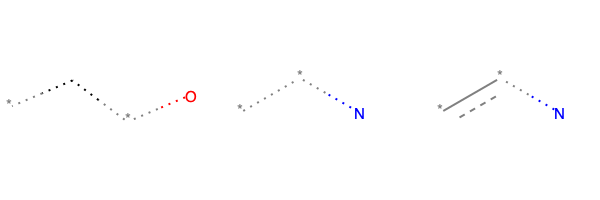

In [40]:
# Example MACCS keys
from rdkit.Chem import MACCSkeys

smarts = [MACCSkeys.smartsPatts[x][0] for x in (132, 133, 135)]
print(smarts)

mols = [Chem.MolFromSmarts(x) for x in smarts]

# A detail: get the molecules ready to be drawn:
for m in mols: 
    m.UpdatePropertyCache()
    
Draw.MolsToGridImage(mols)

In [41]:
# Calculation of MACCS fingerprint

fp1 = MACCSkeys.GenMACCSKeys(mol1)
fp2 = MACCSkeys.GenMACCSKeys(mol2)

In [42]:
fp1.ToBitString()

'00000000000000000000000000000000000000100010000000000000010000000100000010010100100001110000010101101101010101010100001011100111110011110110001111111011110111111111110'

In [43]:
fp2.ToBitString()

'00000000000000000100000000000000000000100000000000000000000000000100000010000100100000100000010001100100010001000101101011000111000011010110101111110111110111111111110'

### Molecular similarity

In [44]:
from rdkit import DataStructs

In [45]:
# Tanimoto
commonBits = fp1&fp2
print('fp1:',fp1.GetNumOnBits(),'fp2:',fp2.GetNumOnBits(),'num in common:',commonBits.GetNumOnBits())
print(commonBits.GetNumOnBits()/(fp1.GetNumOnBits()+fp2.GetNumOnBits()-commonBits.GetNumOnBits()))
print('Tanimoto:', DataStructs.TanimotoSimilarity(fp1,fp2))

fp1: 60 fp2: 50 num in common: 45
0.6923076923076923
Tanimoto: 0.6923076923076923
